# *Ortam Hazırlıgı*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation

/content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation


In [3]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation


In [3]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# Test / Prediction

In [5]:
!yolo segment predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.73M/6.73M [00:00<00:00, 63.2MB/s]
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

100% 476k/476k [00:00<00:00, 10.3MB/s]
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 431.1ms
Speed: 21.0ms preprocess, 431.1ms inference, 59.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


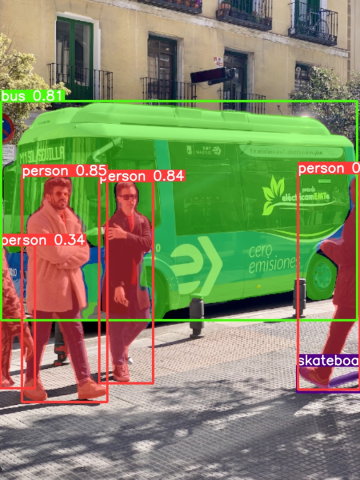

In [9]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

image_path = "runs/segment/predict/bus.jpg"

img = cv2.imread(image_path)
img = imutils.resize(img, width=360)
cv2_imshow(img)

## Eğitim // Training

In [4]:
!unzip data/car_part_dataset.zip -d data

Archive:  data/car_part_dataset.zip
   creating: data/car_part_dataset/images/
   creating: data/car_part_dataset/images/test/
  inflating: data/car_part_dataset/images/test/1003.jpg  
  inflating: data/car_part_dataset/images/test/1008.jpg  
  inflating: data/car_part_dataset/images/test/1009.jpg  
  inflating: data/car_part_dataset/images/test/1012.jpg  
  inflating: data/car_part_dataset/images/test/1015.jpg  
  inflating: data/car_part_dataset/images/test/1022.jpg  
  inflating: data/car_part_dataset/images/test/1034.jpg  
  inflating: data/car_part_dataset/images/test/1036.jpg  
  inflating: data/car_part_dataset/images/test/1037.jpg  
  inflating: data/car_part_dataset/images/test/1049.jpg  
  inflating: data/car_part_dataset/images/test/105.jpg  
  inflating: data/car_part_dataset/images/test/1062.jpg  
  inflating: data/car_part_dataset/images/test/1066.jpg  
  inflating: data/car_part_dataset/images/test/1071.jpg  
  inflating: data/car_part_dataset/images/test/1083.jpg  
  in

In [5]:
!yolo segment train data=data/config.yaml model=yolov8n-seg.pt epochs=20 imgsz=640 workers=8 batch=8 device=0 name=yolov8_car_part_segmentation

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data/config.yaml, epochs=20, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_car_part_segmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

##Test // Prediction

In [6]:
!yolo segment predict model=runs/segment/yolov8_car_part_segmentation/weights/best.pt source='data/car_part_dataset/images/test' save=True

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs

image 1/176 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1003.jpg: 640x640 1 back_bumper, 1 back_glass, 2 back_lights, 9.3ms
image 2/176 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1008.jpg: 640x640 1 front_bumper, 1 front_glass, 2 front_lights, 1 hood, 23.8ms
image 3/176 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1009.jpg: 640x640 1 back_bumper, 1 back_door, 1 back_glass, 1 back_light, 1 front_door, 9.4ms
image 4/176 /content/drive/MyDrive/Colab Notebooks/Computer Vision/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1012.jpg: 640x640 1 back_glass, 2 back_lights, 9.3ms
image 5/176 /co